In [1]:
#importation des modules
import tensorflow as tf
from tensorflow import keras

In [2]:
#chargement du jeu de données MNIST Fashion
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#dimension des donnnées
X_train_full.shape

(60000, 28, 28)

In [4]:
#une instance des données
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
#son étiquette
y_train_full[0]

9

In [6]:
#pour entrainer un réseau de neuronnes par descente de gradient il faut normaliser les données
#on les normalisera trèsn simplement en diminuant l'intensité des pixels entre 0 et 1
X_train_full = X_train_full / 255.0 #en convetissant en floats les données (MLP layers works on float in keras)

In [7]:
#on ne dispose pas de jeu de validation, il nous faut en créer un
#nécessaire pour la recherche de meilleurs meilleurs modèles et donc d'hyperamètres optimaux
#prenons les 5000 premières observations comme ensemble des validations
X_valid = X_train_full[:5000]
y_valid =  y_train_full[:5000]

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

In [8]:
#en réalité, les étiquettes sont toutes nommées, voici les classes en expression correcte de l'encodage 0 à 9
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
#reaffichons l'étiquette du premier exemple 
class_names[y_train[0]]

'Coat'

In [10]:
#voici une description en image de ce que représente les classe de 0 à 9 sur 40 images aléatoires

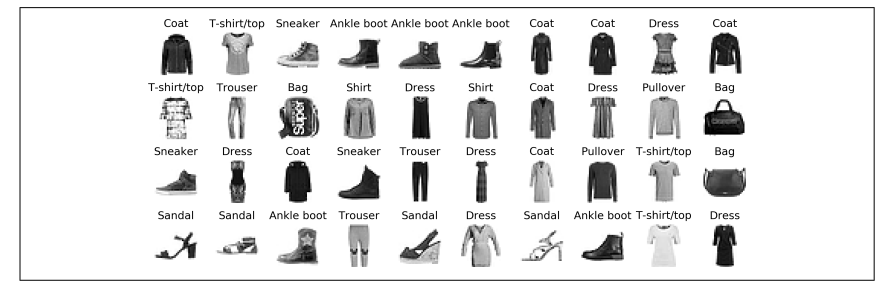

In [11]:
#construisons un réseau de neurones apprenant à classifier ces images : avec l'API séquentiel de Keras
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape = (28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

#il est possible d'jouter directement l'input shape dans la première couche de l'API séquentiel sans passer
#par la couche de dimension d'entrée keras.layers.InputLayer : 
#model.add(keras.layers.Flatten(input_shape = (28,28)))

In [12]:
#afficher un résumé de l'architecture du réseau construit
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
#une approche de construire notre modèle c'est de passer toutes les couches, comme une list, lors de la création du modèle
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

#model2.summary()

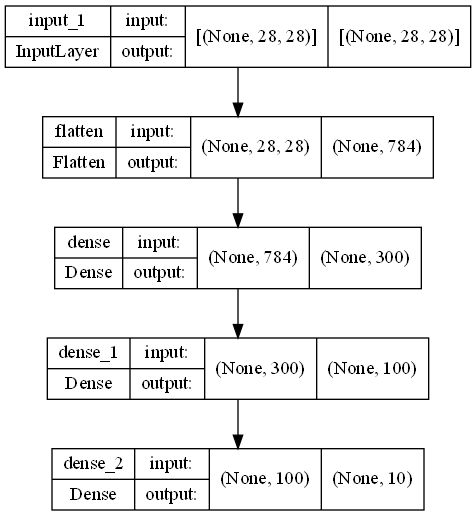

In [14]:
#il est possible de visualiser graphiquement le réseau (installer pydot + graphviz)
keras.utils.plot_model(model, show_shapes = True)

In [15]:
#on peut obtenir une liste des couches du réseau une fois qu'il est créé
model.layers

In [16]:
#récupérons par exemple la première couche dense
hidden1 = model.layers[1]

In [17]:
#on peut accéder à l'ensemble des poids d'une couche à travers la méthode get_weights
hidden1.get_weights()

#noté bien que sont rétournés tous les poids des unités, mais aussi tous les termes constant des unités

[array([[-0.05424724, -0.00394032, -0.04868035, ...,  0.03237183,
         -0.07137496, -0.04315515],
        [-0.05900651, -0.01638509,  0.01331838, ..., -0.02074272,
         -0.0385459 , -0.01514302],
        [-0.03500975,  0.01256028,  0.0308007 , ...,  0.06783006,
         -0.00826412,  0.04489662],
        ...,
        [-0.00696196,  0.07184385, -0.05672151, ..., -0.01774935,
         -0.03418134, -0.05222702],
        [ 0.00402981,  0.03909212, -0.03999531, ..., -0.0144389 ,
          0.0218654 , -0.01634942],
        [-0.04361137,  0.06306247, -0.03207451, ...,  0.01200987,
         -0.06404442, -0.06822734]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
#récupérons ces informations
weights, biaises = hidden1.get_weights()

In [19]:
#pour chaque unité de la première couche on a 784 paramètres
weights.shape

(784, 300)

In [20]:
#pour chaque unité de la première couche on a un terme de biais
biaises.shape

(300,)

In [21]:
#après avoir construit un modèle avec Keras, ici en particulier avec l'API séquentiel, il faut le compiler
#compiler un modèle pour Keras signifie : préciser la fonction de perte qui sera minimisée, préciser la manière de minimiser
#cette perte en spécifiant le type d'algorithme de descente de gradient utilisé, préciser la façon dont il faudra évaluer
#le modèle final obtenu

model.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [22]:
#tout est bon, nous pouvons à présent entraîner notre RNA
#disposer d'un GPU lors de l'entrainement accélère ce processus
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 55)

Epoch 1/55
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7219 - accuracy: 0.7614 - val_loss: 0.5176 - val_accuracy: 0.8296
Epoch 2/55
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4908 - accuracy: 0.8293 - val_loss: 0.4613 - val_accuracy: 0.8434
Epoch 3/55
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4457 - accuracy: 0.8432 - val_loss: 0.4192 - val_accuracy: 0.8524
Epoch 4/55
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4186 - accuracy: 0.8523 - val_loss: 0.4029 - val_accuracy: 0.8584
Epoch 5/55
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3971 - accuracy: 0.8599 - val_loss: 0.3816 - val_accuracy: 0.8668
Epoch 6/55
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3808 - accuracy: 0.8656 - val_loss: 0.3823 - val_accuracy: 0.8620
Epoch 7/55
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3673 - accuracy: 0.8697 - val_loss: 0.3731 - val_accuracy:

In [23]:
#après entraînement, noter que la méthode .fit() retourne un objet History que nous avons stocké dans "history"
#history possède un attribue history qui permet d'accéder aux pertes et métriques d'évaluations calculé sur le train et le valid
print(history.history)

#nous pouvons nous servir de ces informations pour construire la courbe d'apprentissage

{'loss': [0.7219043970108032, 0.4908079206943512, 0.4456839859485626, 0.4186224043369293, 0.39709946513175964, 0.3807889223098755, 0.36733296513557434, 0.3554207384586334, 0.3446410894393921, 0.3351038694381714, 0.32720130681991577, 0.31786367297172546, 0.3100720942020416, 0.3041743338108063, 0.29729530215263367, 0.2917012870311737, 0.28440821170806885, 0.279170960187912, 0.27418428659439087, 0.2679576575756073, 0.2626621127128601, 0.2582140862941742, 0.2544190585613251, 0.2486146092414856, 0.24505998194217682, 0.24104087054729462, 0.23745042085647583, 0.2329210340976715, 0.22935906052589417, 0.2252323478460312, 0.22156959772109985, 0.21826893091201782, 0.21426048874855042, 0.21101003885269165, 0.20713327825069427, 0.20432867109775543, 0.2005399465560913, 0.1975044459104538, 0.19507569074630737, 0.19279882311820984, 0.1878981739282608, 0.18614543974399567, 0.18327297270298004, 0.17931923270225525, 0.1766485869884491, 0.1749453842639923, 0.17203140258789062, 0.16918358206748962, 0.16670

In [24]:
#d'autres informations sont stockées dans history telles que les paramètres d'apprentissage
history.params

{'verbose': 1, 'epochs': 55, 'steps': 1719}

In [25]:
#ou encore l'index des epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


       loss  accuracy  val_loss  val_accuracy
0  0.721904  0.761382  0.517569        0.8296
1  0.490808  0.829273  0.461260        0.8434
2  0.445684  0.843164  0.419151        0.8524
3  0.418622  0.852309  0.402897        0.8584
4  0.397099  0.859855  0.381582        0.8668


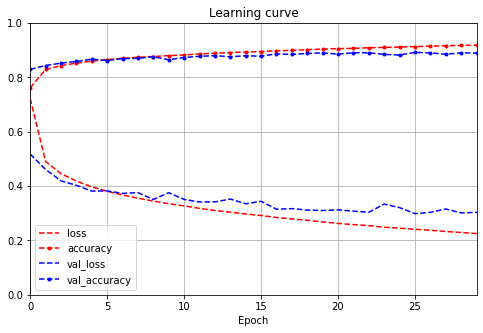

In [26]:
#construisons à présent la courbe d'apprentissage
import pandas as pd
import matplotlib.pyplot as plt

df_hist = pd.DataFrame(history.history)

print(df_hist.head())

df_hist.plot(figsize=(8, 5), style=["r--", "r--.", "b--", "b--."], xlim=[0, 29], ylim=[0, 1],  grid=True, xlabel="Epoch",
            title = "Learning curve")
plt.show()

In [27]:
#attention l'erreur de validation est calculée à la fin de chaque époque tandis que l'erreur d'entrainement
#est une moyenne glissante de l'erreur calculée sur les instances d'entrainement pour une époque
#cela explique que l'erreur de validation soit plus petite en début d'apprentissage que l'erreur d'entrainement
#en réalité la courbe d'entraînement doit être décalée de moitié d'époque pour que tout soit correcte

In [28]:
#commentons la courbe d'apprentissage :
#--visuellement, il y a un faible risque de surapprentissage
#--les erreurs sont toujours en phase de décroissance, le nombre d'époque affiché montre qu'ils n'ont en réalité pas encore
#convergés, il préférable de poursuivre l'entrainement
#history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, verbose = 0)

#remarquer que l'invocation de la méthode fit, poursuit l'entraînement là où il s'est arrêté c'est à dire à une erreur
#de validation d'approximativement 0.29

In [29]:
#df_hist = pd.DataFrame(history.history)
#df_hist.plot(figsize=(8, 5), style=["r--", "r--.", "b--", "b--."], xlim=[0, 100], ylim=[0, 1],  grid=True, xlabel="Epoch",
#           title = "Learning curve")
#plt.show()

In [30]:
#cette nouvelle courbe d'apprentissage montre qu'il est préférable de stopper l'apprentissager autour de 35 épochs car
#le risque de surapprentissage devient très grand : c'est enfait 30 + 35 epochs en prenant en compte la coubre précédente

#d'où le modèle final suivant :
#model.compile(optimizer = keras.optimizers.SGD(learning_rate=0.02), loss = "sparse_categorical_crossentropy", 
#              metrics = ["accuracy"])
#history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 55)